**Задание 1:**

Анализ датасета.

Описание сета

*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS - proportion of non-retail business acres per town.
*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxides concentration (parts per 10 million)
*   RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per $10,000
*   PTRATIO - pupil-teacher ratio by town
*   B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT - % lower status of the population
*   MEDV - Median value of owner-occupied homes in $1000's`


In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv("files/BostonHousing.csv")

In [198]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [199]:
train_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [200]:
correlation_matrix = train_df.corr()
correlation_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

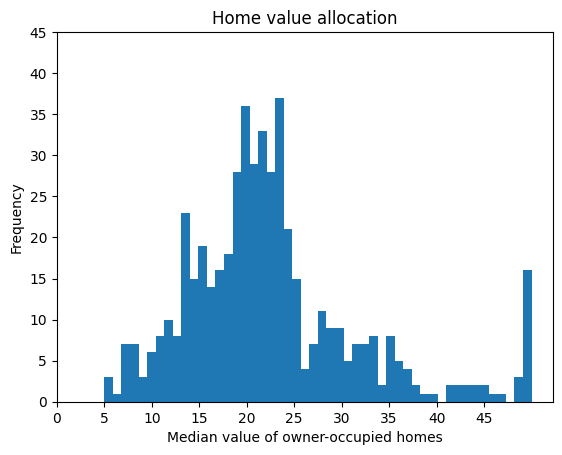

In [201]:
train_df['medv'].plot(kind='hist', bins=50)

plt.title('Home value allocation')

max_count = train_df['medv'].values.max()
yticks = range(0, int(max_count), 5)
plt.yticks(yticks)

xticks = range(0, int(max_count), 5)
plt.xticks(xticks)

plt.xlabel('Median value of owner-occupied homes')

plt.show()

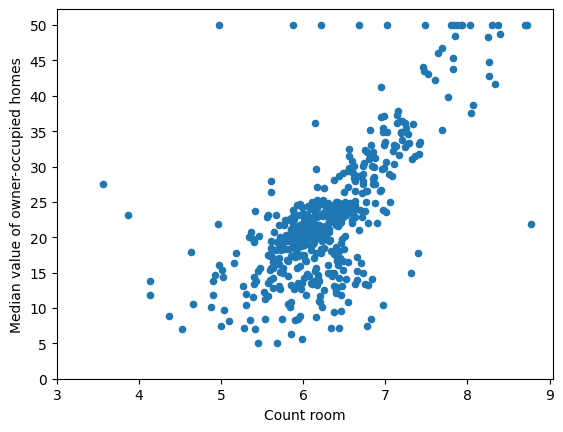

In [203]:
train_df.plot(kind='scatter', x='rm', y='medv')

max_count = train_df['medv'].values.max()
yticks = range(0, int(max_count) + 5, 5)
plt.yticks(yticks)

max_count = train_df['rm'].values.max()
xticks = range(3, int(max_count) + 2, 1)
plt.xticks(xticks)

plt.xlabel('Count room')
plt.ylabel('Median value of owner-occupied homes')

plt.show()

In [204]:
train_df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


<Axes: ylabel='Frequency'>

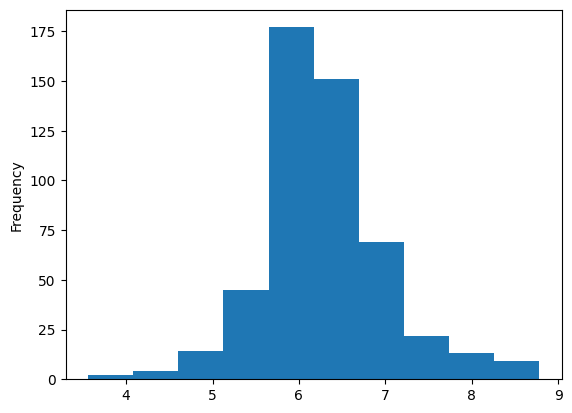

In [206]:
train_df["rm"].plot(kind="hist")

In [207]:
step = [0, 4, 5, 6, 7, 8, 10]
labels = ['<=4', '4-5', '5-6', '6-7', '7-8', '>8']
train_df['rm_step'] = pd.cut(train_df['rm'], bins=step, labels=labels)

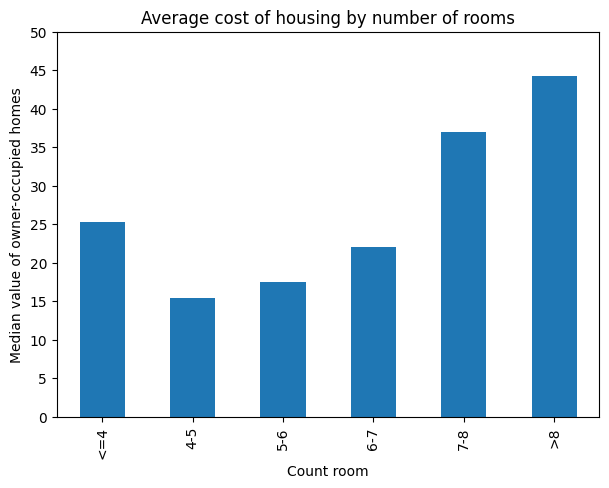

In [208]:
plt.figure(figsize=(7, 5))
train_df.groupby('rm_step', observed=False)['medv'].mean().plot(kind='bar')

max_count = train_df['medv'].values.max()
yticks = range(0, int(max_count) + 5, 5)
plt.yticks(yticks)

plt.title('Average cost of housing by number of rooms')
plt.xlabel('Count room')
plt.ylabel('Median value of owner-occupied homes')
plt.show()

In [209]:
train_df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,rm_step
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,6-7
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,6-7
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,7-8
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,6-7
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,7-8
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,6-7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,6-7
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,6-7
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,5-6
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,6-7


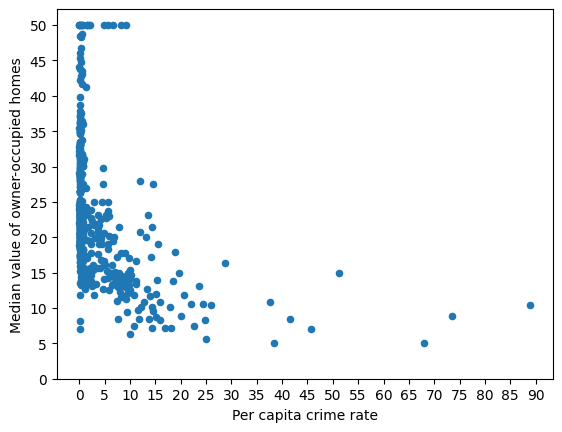

In [210]:
train_df.plot(kind='scatter', x='crim', y='medv')

max_count = train_df['medv'].values.max()
yticks = range(0, int(max_count) + 5, 5)
plt.yticks(yticks)

max_count = train_df['crim'].values.max()
xticks = range(0, int(max_count) + 5, 5)
plt.xticks(xticks)

plt.xlabel('Per capita crime rate')
plt.ylabel('Median value of owner-occupied homes')

plt.show()

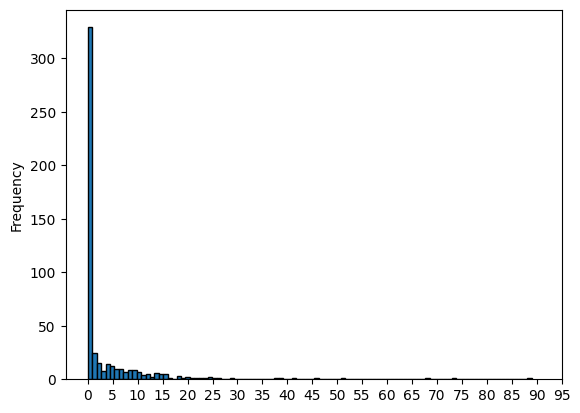

In [211]:
train_df["crim"].plot(kind="hist", bins=100, edgecolor='black')
xticks = range(0, 100, 5)
plt.xticks(xticks)

plt.show()

In [212]:
step = [0, 0.1, 0.5, 1, 5, 10, 100]
labels = ['<=0.1', '0.1-0.5', '0.5-1', '1-5', '5-10', '>10']
train_df['crim_step'] = pd.cut(train_df['crim'], bins=step, labels=labels)

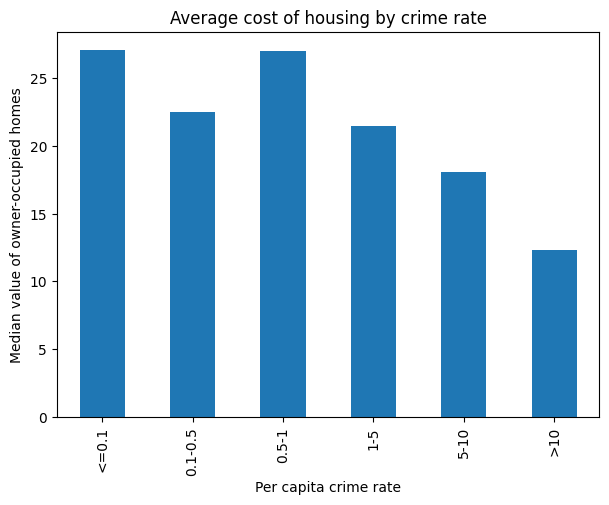

In [213]:
plt.figure(figsize=(7, 5))
train_df.groupby('crim_step', observed=False)['medv'].mean().plot(kind='bar')

plt.title('Average cost of housing by crime rate')
plt.xlabel('Per capita crime rate')
plt.ylabel('Median value of owner-occupied homes')
plt.show()

# не правильно показывает из-за mean, так как берёт среднее

In [214]:
train_df.groupby('chas')['medv'].mean()

chas
0    22.093843
1    28.440000
Name: medv, dtype: float64